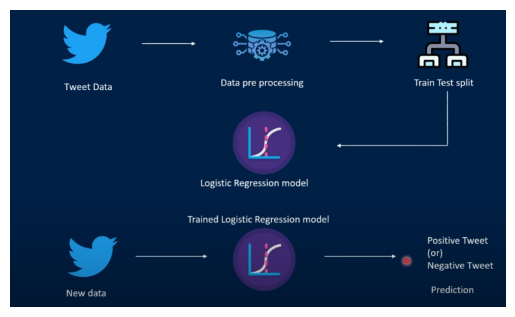

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('/home/catpc/Pictures/Screenshots/Methodology.png')
plt.imshow(img)
plt.axis('off')  # Axis বন্ধ করতে
plt.show()


In [2]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("kazanova/sentiment140")

print("Path to dataset files:", path)

Path to dataset files: /home/catpc/.cache/kagglehub/datasets/kazanova/sentiment140/versions/2


In [3]:
import pandas as pd
import numpy as np
import os

path = "/home/catpc/.cache/kagglehub/datasets/kazanova/sentiment140/versions/2"
print(os.listdir(path))


['training.1600000.processed.noemoticon.csv']


In [4]:
import pandas as pd

# ফাইল পাথ
file_path = "/home/catpc/.cache/kagglehub/datasets/kazanova/sentiment140/versions/2/training.1600000.processed.noemoticon.csv"

# ডেটাসেট লোড
df = pd.read_csv(file_path, encoding='latin-1', header=None)

# কলাম নাম সেট করা
df.columns = ['target', 'ids', 'date', 'flag', 'user', 'text']

# প্রথম ৫টা রো দেখানো
df.head()


,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype 
---  ------  --------------    ----- 
 0   target  1600000 non-null  int64 
 1   ids     1600000 non-null  int64 
 2   date    1600000 non-null  object
 3   flag    1600000 non-null  object
 4   user    1600000 non-null  object
 5   text    1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [6]:
df.isna().sum()

target    0
ids       0
date      0
flag      0
user      0
text      0
dtype: int64

In [7]:
df['target'].value_counts()

target
0    800000
4    800000
Name: count, dtype: int64

In [8]:
#checking the number of rows and columns
df.shape

(1600000, 6)

In [9]:
import numpy as np
import pandas as pd
import nltk
nltk.download('stopwords')

import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


[nltk_data] Downloading package stopwords to /home/catpc/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [10]:
#printing the stopwords
print(stopwords.words('english'))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

In [11]:
df.replace({'target':{4:1}}, inplace=True)

In [12]:
df['target'].value_counts()

target
0    800000
1    800000
Name: count, dtype: int64

# Stemming

# Streaming is the process of reducing a word to root word

In [13]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

prot_stem = PorterStemmer()

def stemming(content):
    # অক্ষর বাদে সব কিছু বাদ দিচ্ছি
    content = re.sub('[^a-zA-Z]', ' ', content)
    content = content.lower()
    words = content.split()
    
    # stopwords বাদ দিয়ে stemming করছি
    stemmed_words = [prot_stem.stem(word) for word in words if word not in stopwords.words('english')]
    
    # শব্দগুলো আবার একত্র করছি
    stemmed_content = ' '.join(stemmed_words)
    return stemmed_content


In [14]:
print('hello , world')

hello , world


In [15]:
df

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
...,...,...,...,...,...,...
1599995,1,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599996,1,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599997,1,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599998,1,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [17]:
stemming("hi i am atik hasan arik")

'hi atik hasan arik'

In [18]:
df['stemmed_content'] = df['text'].apply(stemming)

In [19]:
df.head()

,target,ids,date,flag,user,text,stemmed_content
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t...",switchfoot http twitpic com zl awww bummer sho...
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...,upset updat facebook text might cri result sch...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...,kenichan dive mani time ball manag save rest g...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire,whole bodi feel itchi like fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all....",nationwideclass behav mad see


In [22]:
print(df['stemmed_content'])

0          switchfoot http twitpic com zl awww bummer sho...
1          upset updat facebook text might cri result sch...
2          kenichan dive mani time ball manag save rest g...
3                            whole bodi feel itchi like fire
4                              nationwideclass behav mad see
                                 ...                        
1599995                           woke school best feel ever
1599996    thewdb com cool hear old walt interview http b...
1599997                         readi mojo makeov ask detail
1599998    happi th birthday boo alll time tupac amaru sh...
1599999    happi charitytuesday thenspcc sparkschar speak...
Name: stemmed_content, Length: 1600000, dtype: object


In [23]:
print(df['target'])

0          0
1          0
2          0
3          0
4          0
          ..
1599995    1
1599996    1
1599997    1
1599998    1
1599999    1
Name: target, Length: 1600000, dtype: int64


In [25]:
#separating the data and label
x = df['stemmed_content'].values
y = df['target'].values

In [27]:
x

array(['switchfoot http twitpic com zl awww bummer shoulda got david carr third day',
       'upset updat facebook text might cri result school today also blah',
       'kenichan dive mani time ball manag save rest go bound', ...,
       'readi mojo makeov ask detail',
       'happi th birthday boo alll time tupac amaru shakur',
       'happi charitytuesday thenspcc sparkschar speakinguph h'],
      dtype=object)

In [28]:
y

array([0, 0, 0, ..., 1, 1, 1])

In [47]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,stratify=y,random_state=2)

In [48]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1280000,), (320000,), (1280000,), (320000,))

In [49]:
x_train


array(['watch saw iv drink lil wine', 'hatermagazin',
       'even though favourit drink think vodka coke wipe mind time think im gonna find new drink',
       ..., 'eager monday afternoon',
       'hope everyon mother great day wait hear guy store tomorrow',
       'love wake folger bad voic deeper'], dtype=object)

In [50]:
x_test

array(['mmangen fine much time chat twitter hubbi back summer amp tend domin free time',
       'ah may show w ruth kim amp geoffrey sanhueza',
       'ishatara mayb bay area thang dammit', ...,
       'destini nevertheless hooray member wonder safe trip', 'feel well',
       'supersandro thank'], dtype=object)

In [51]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

# Fit only on training data
x_train = vectorizer.fit_transform(x_train)

# Transform test data using the same fitted vectorizer
x_test = vectorizer.transform(x_test)


In [54]:
print(x_train)

  (0, 436713)	0.2725987626483838
  (0, 354543)	0.3588091611460021
  (0, 185193)	0.5277679060576009
  (0, 109306)	0.3753708587402299
  (0, 235045)	0.41996827700291095
  (0, 443066)	0.4484755317023172
  (1, 160636)	1.0
  (2, 109306)	0.4591176413728317
  (2, 124484)	0.1892155960801415
  (2, 407301)	0.1870933868497303
  (2, 129411)	0.29074192727957143
  (2, 406399)	0.32105459490875526
  (2, 433560)	0.3296595898028565
  (2, 77929)	0.31284080750346344
  (2, 443430)	0.3348599670252845
  (2, 266729)	0.24123230668976975
  (2, 409143)	0.15169282335109835
  (2, 178061)	0.1619010109445149
  (2, 150715)	0.18803850583207948
  (2, 132311)	0.20289715703997938
  (2, 288470)	0.16786949597862733
  (3, 406399)	0.29029991238662284
  (3, 158711)	0.44569393722995737
  (3, 151770)	0.278559647704793
  (3, 56476)	0.5200465453608686
  :	:
  (1279996, 318303)	0.21254698865277746
  (1279996, 434014)	0.2718945052332447
  (1279996, 390130)	0.2206474219107611
  (1279996, 373144)	0.3521250099983204
  (1279996, 238077)

In [56]:
print(x_test)

  (0, 15110)	0.1719352837797837
  (0, 31168)	0.1624772418052177
  (0, 67828)	0.26800375270827315
  (0, 106069)	0.36555450010904555
  (0, 132364)	0.255254889555786
  (0, 138164)	0.23688292264071406
  (0, 171378)	0.2805816206356074
  (0, 271016)	0.45356623916588285
  (0, 279082)	0.17825180109103442
  (0, 388348)	0.21985076072061735
  (0, 398906)	0.3491043873264267
  (0, 409143)	0.3143047059807971
  (0, 420984)	0.17915624523539805
  (1, 6463)	0.30733520460524466
  (1, 15110)	0.211037449588008
  (1, 145393)	0.575262969264869
  (1, 217562)	0.40288153995289894
  (1, 256777)	0.28751585696559306
  (1, 348135)	0.4739279595416274
  (1, 366203)	0.24595562404108307
  (2, 22532)	0.3532582957477176
  (2, 34401)	0.37916255084357414
  (2, 89448)	0.36340369428387626
  (2, 183312)	0.5892069252021465
  (2, 256834)	0.2564939661498775
  :	:
  (319994, 443794)	0.27821856410325374
  (319995, 107868)	0.33399349737546963
  (319995, 109379)	0.3020896484890833
  (319995, 155493)	0.2770682832971669
  (319995, 213

# Training the machine learning model 

In [57]:
model = LogisticRegression(max_iter=1000)
model.fit(x_train,y_train)



LogisticRegression(max_iter=1000)

# Accuracy score 

In [60]:
x_train_prediction = model.predict(x_train)
training_data_accuracy = accuracy_score(y_train,x_train_prediction)


In [61]:
training_data_accuracy

0.79871953125

In [63]:
#accuracy score in the test data 
x_test_prediction = model.predict(x_test)
test_data_accuracy = accuracy_score(y_test,x_test_prediction)

In [65]:
test_data_accuracy

0.77668125

# saving the trained model

In [66]:
import pickle
filename = 'trained_model.sav'
pickle.dump(model, open(filename,'wb'))


# Using the saved model for future prediction

In [68]:
#loading the saved model
loaded_model = pickle.load(open('/home/catpc/trained_model.sav','rb'))

In [69]:
loaded_model

LogisticRegression(max_iter=1000)

In [72]:
x_new = x_test[200]
print(y_test[200])

prediction = model.predict(x_new)
print(prediction)
if prediction == 0:
    print("Negative")
else:
    print("Positive")

1
[1]
Positive


In [74]:
_new = x_test[200]
print(y_test[200])

prediction = loaded_model.predict(x_new)
print(prediction)
if prediction == 0:
    print("Negative")
else:
    print("Positive")

1
[1]
Positive
